In [1]:
#Gail Stock Price prediction using RNN 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('GAIL.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-18,147.199997,147.800003,145.050003,145.600006,135.598816,4409849
1,2021-08-20,140.000000,144.399994,140.000000,140.350006,130.709427,14354380
2,2021-08-23,142.600006,144.100006,140.000000,140.800003,131.128525,7997462
3,2021-08-24,142.000000,148.000000,141.949997,145.449997,135.459122,21248075
4,2021-08-25,146.600006,147.500000,144.000000,144.899994,134.946899,7673148


In [3]:
df['Date'].min() , df['Date'].max()

('2021-08-18', '2022-08-18')

In [4]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       249 non-null    object 
 1   Open       249 non-null    float64
 2   High       249 non-null    float64
 3   Low        249 non-null    float64
 4   Close      249 non-null    float64
 5   Adj Close  249 non-null    float64
 6   Volume     249 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [6]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-18,147.199997,147.800003,145.050003,145.600006,135.598816,4409849
1,2021-08-20,140.000000,144.399994,140.000000,140.350006,130.709427,14354380
2,2021-08-23,142.600006,144.100006,140.000000,140.800003,131.128525,7997462
3,2021-08-24,142.000000,148.000000,141.949997,145.449997,135.459122,21248075
4,2021-08-25,146.600006,147.500000,144.000000,144.899994,134.946899,7673148


In [7]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [8]:
df.shape

(249, 7)

In [9]:
df[["Date","Open"]].head()

,Date,Open
0,2021-08-18,147.199997
1,2021-08-20,140.000000
2,2021-08-23,142.600006
3,2021-08-24,142.000000
4,2021-08-25,146.600006


In [10]:
#To check null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
#separate Open column from given dataset 
df1=df.iloc[:,1:2].values #or df1=df['Open']  df.loc[:,'Open']
#1:2 means start=1 and stop=2-1=1
type(df1)
df1

array([[147.199997],
       [140.      ],
       [142.600006],
       [142.      ],
       [146.600006],
       [144.899994],
       [143.300003],
       [143.350006],
       [145.949997],
       [147.      ],
       [145.899994],
       [146.      ],
       [149.      ],
       [146.899994],
       [145.      ],
       [144.949997],
       [145.949997],
       [147.199997],
       [156.      ],
       [157.      ],
       [156.850006],
       [152.      ],
       [149.800003],
       [150.899994],
       [152.050003],
       [154.      ],
       [155.      ],
       [154.25    ],
       [157.949997],
       [158.949997],
       [160.199997],
       [164.399994],
       [161.600006],
       [165.      ],
       [168.050003],
       [161.300003],
       [158.899994],
       [158.949997],
       [158.300003],
       [160.      ],
       [161.      ],
       [161.800003],
       [155.      ],
       [153.100006],
       [152.5     ],
       [151.550003],
       [148.850006],
       [152.1

In [1]:
#Feature Scaling is the most important part of data preprocessing 
#Stock market data : low -high 
#Mostly apply Normalisation : means minmaxscalerdf2
from sklearn.preprocessing import MinMaxScaler

In [13]:
#create object of MinMaxScaler class
mms=MinMaxScaler()
df2=mms.fit_transform(df1)

In [14]:
df2

array([[0.45444316],
       [0.29246346],
       [0.35095629],
       [0.33745784],
       [0.44094505],
       [0.40269955],
       [0.36670425],
       [0.36782918],
       [0.42632167],
       [0.44994379],
       [0.42519674],
       [0.4274466 ],
       [0.49493817],
       [0.44769393],
       [0.40494941],
       [0.40382448],
       [0.42632167],
       [0.45444316],
       [0.65241849],
       [0.67491568],
       [0.67154124],
       [0.56242973],
       [0.51293599],
       [0.53768269],
       [0.56355466],
       [0.60742411],
       [0.6299213 ],
       [0.61304841],
       [0.69628794],
       [0.71878513],
       [0.74690662],
       [0.84139475],
       [0.77840289],
       [0.8548932 ],
       [0.92350969],
       [0.77165366],
       [0.71766021],
       [0.71878513],
       [0.70416209],
       [0.74240725],
       [0.76490444],
       [0.78290226],
       [0.6299213 ],
       [0.58717678],
       [0.57367833],
       [0.55230607],
       [0.49156372],
       [0.565

In [15]:
#no. of rows
len(df2)

249

In [16]:
# Now seperate input and output from one column opening
X_train=df2[0:248]
Y_train=df2[1:249]

In [17]:
len(X_train),len(Y_train)

(248, 248)

In [18]:
# Check dimension
X_train.ndim

2

In [19]:
#We provide 3D data then we converts our input X_train data into 3D 
X_train=np.reshape(X_train,(248,1,1))   # t+1=1
# reshape(data,(rows,cols,timestamp))

In [20]:
#To check dimension
X_train.ndim

3

In [21]:
#Part-2 : -
#Building the RNN with LSTM 
#Recurrent neural network 
#LSTM means long short term memory 
from tensorflow.keras.models import Sequential #initialise neural network
from tensorflow.keras.layers import Dense,Dropout #to add input layer,output layer,
#and hidden layer
from tensorflow.keras.layers import LSTM  #to use built the model 
#LSTM : to manage internal memory , to store previous o/p 
#long short term memory 

2022-08-21 13:20:03.328885: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-21 13:20:03.328916: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [22]:
#create objecgt of Sequential class
model=Sequential()

2022-08-21 13:20:04.796134: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-21 13:20:04.796166: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-21 13:20:04.796190: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (desktop): /proc/driver/nvidia/version does not exist


In [23]:
#To add layers in model
#This layer are input layer and LSTM layer 
model.add(LSTM(units=50,activation='sigmoid',input_shape=(None,1)))
#None means to take no. of rows and 1 means 1 column
# Take droupout as we have to consider more neurons
model.add(Dropout(0.1))    # .........0.1 means 10 percent
#To add output layer 
model.add(Dense(units=1,activation='linear'))    # by default activation='sigmoid'

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [25]:
#compile the model 
model.compile(optimizer='adam',loss='mean_squared_error')

In [26]:
X_train1=X_train[:198]
X_test=X_train[198:]

In [27]:
len(X_train1)

198

In [28]:
Y_train1=Y_train[:198]
Y_test=Y_train[198:]

In [29]:
len(Y_train1),len(Y_test)

(198, 50)

In [30]:
#early stopping 
from tensorflow.keras.callbacks import EarlyStopping
#procedure for callback(EarlyStopping)
cb = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [31]:
# train the model
trained_model=model.fit(X_train1,Y_train1,validation_data=(X_test,Y_test),
                        epochs=2000,callbacks=cb)

Epoch 1/2000
7/7 [==============================] - 1s 40ms/step - loss: 0.6281 - val_loss: 0.2751
Epoch 2/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.4591 - val_loss: 0.1718
Epoch 3/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.3320 - val_loss: 0.0979
Epoch 4/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.2255 - val_loss: 0.0514
Epoch 5/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.1577 - val_loss: 0.0265
Epoch 6/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.1102 - val_loss: 0.0175
Epoch 7/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0796 - val_loss: 0.0179
Epoch 8/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0682 - val_loss: 0.0231
Epoch 9/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0619 - val_loss: 0.0302
Epoch 10/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0585 - val_loss: 0.0366
Epoch 11/2000
7/7 

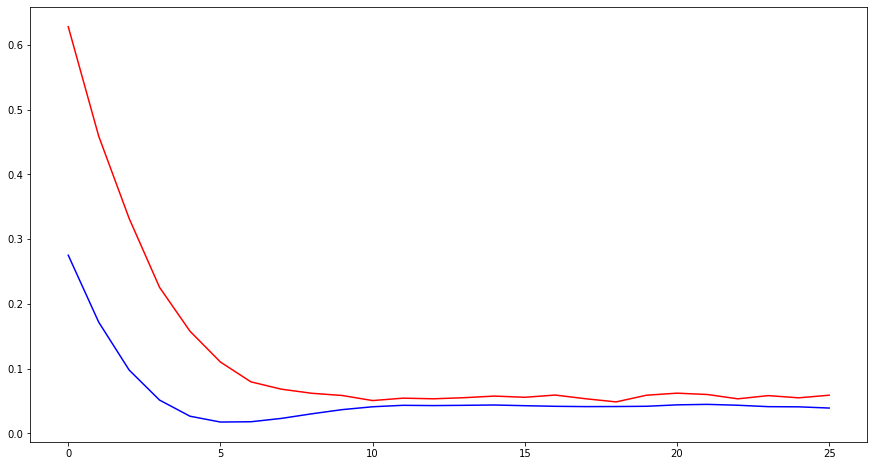

In [32]:
plt.figure(figsize=(15,8))
plt.plot(trained_model.history['loss'],color='red',label='trainig loss')
plt.plot(trained_model.history['val_loss'],color='blue',label='testing loss')
plt.show()

In [33]:
# Testing the model with 20% data
Y_pred=model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [34]:
Y_pred

array([[0.4714551 ],
       [0.4825598 ],
       [0.48063585],
       [0.48196787],
       [0.47026992],
       [0.4631562 ],
       [0.47500995],
       [0.47308454],
       [0.4435727 ],
       [0.44639313],
       [0.4287198 ],
       [0.4302055 ],
       [0.42574775],
       [0.4287198 ],
       [0.4287198 ],
       [0.4284226 ],
       [0.4337711 ],
       [0.44327575],
       [0.429017  ],
       [0.4198024 ],
       [0.42827404],
       [0.42723382],
       [0.42931414],
       [0.45069712],
       [0.4383756 ],
       [0.44060308],
       [0.44639313],
       [0.4398606 ],
       [0.4452056 ],
       [0.4486196 ],
       [0.45811477],
       [0.45870802],
       [0.4518843 ],
       [0.46019092],
       [0.46078396],
       [0.4680474 ],
       [0.45989436],
       [0.46952906],
       [0.46819562],
       [0.46612078],
       [0.46686187],
       [0.4535164 ],
       [0.44891644],
       [0.4462447 ],
       [0.4287198 ],
       [0.426788  ],
       [0.42277533],
       [0.414

In [35]:
#To remove scaling on Y_pred  , use inverse_transform which are define
#in MinMAxScaler class
Y_pred=mms.inverse_transform(Y_pred)
Y_pred

array([[147.95618],
       [148.44978],
       [148.36426],
       [148.42346],
       [147.9035 ],
       [147.58728],
       [148.1142 ],
       [148.02861],
       [146.7168 ],
       [146.84218],
       [146.0566 ],
       [146.12263],
       [145.92448],
       [146.0566 ],
       [146.0566 ],
       [146.04338],
       [146.28111],
       [146.70361],
       [146.06981],
       [145.66022],
       [146.03677],
       [145.99054],
       [146.08302],
       [147.03348],
       [146.4858 ],
       [146.58481],
       [146.84218],
       [146.5518 ],
       [146.78938],
       [146.94115],
       [147.3632 ],
       [147.38957],
       [147.08626],
       [147.45549],
       [147.48186],
       [147.8047 ],
       [147.4423 ],
       [147.87056],
       [147.8113 ],
       [147.71907],
       [147.75201],
       [147.1588 ],
       [146.95435],
       [146.83557],
       [146.0566 ],
       [145.97072],
       [145.79236],
       [145.42232],
       [145.85182],
       [146.24811]],

In [36]:
#To remove scaling on Y_test  , use inverse_transform which are define
#in MinMAxScaler class
Y_test1=mms.inverse_transform(Y_test)
Y_test1

array([[152.149994],
       [151.5     ],
       [151.949997],
       [148.      ],
       [145.600006],
       [149.600006],
       [148.949997],
       [139.      ],
       [139.949997],
       [134.      ],
       [134.5     ],
       [133.      ],
       [134.      ],
       [134.      ],
       [133.899994],
       [135.699997],
       [138.899994],
       [134.100006],
       [131.      ],
       [133.850006],
       [133.5     ],
       [134.199997],
       [141.399994],
       [137.25    ],
       [138.      ],
       [139.949997],
       [137.75    ],
       [139.550003],
       [140.699997],
       [143.899994],
       [144.100006],
       [141.800003],
       [144.600006],
       [144.800003],
       [147.25    ],
       [144.5     ],
       [147.75    ],
       [147.300003],
       [146.600006],
       [146.850006],
       [142.350006],
       [140.800003],
       [139.899994],
       [134.      ],
       [133.350006],
       [132.      ],
       [129.199997],
       [132.4

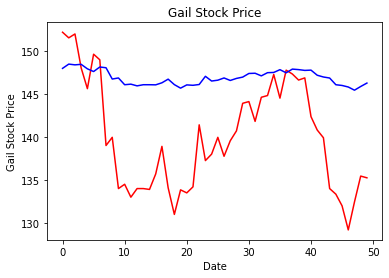

In [37]:
# for compare Actual value Stock Price and Predicted Stock price,
# Use Visualisation
plt.plot(Y_test1,color='red',label='Actual Stock Price')
plt.plot(Y_pred,color='blue',label='Predicterd Stock Price')
plt.title('Gail Stock Price')
plt.xlabel('Date')
plt.ylabel('Gail Stock Price')
plt.show()

In [38]:
# Evaluation of model: find r2_score
from sklearn.metrics import r2_score   # No need to remove r2_score as we are using deep learning
r2_score(Y_test1,Y_pred)

-1.0235906764293876

In [39]:
# Predict next dat stock price
n=float(input('Enter Today Opening Stock Price :'))
# here n is scaler variable 
# print(type(n))
# First, convert n into 2D numpy array
n=np.array(n).reshape(-1,1)   # here -1 means None means automatic accept no. or rows but next 1 means no. of column
#print(type(n))
#print(n.ndim)
# Apply scaling : normalisation means MinMaxScaler
n1=mms.transform(n)
#print(n1)
# converts n1 from 2D into 3D array
v=n1.reshape(-1,1,1)
# print(v)
# prediction
pred=model.predict(v)
# print(pred)
# to remove scaling
final=mms.inverse_transform(pred)
print('Opening Price of Next day: ',final)

Enter Today Opening Stock Price :135
1/1 [==============================] - 0s 17ms/step
Opening Price of Next day:  [[146.18869]]


In [ ]:
# If we want to predict stock price of next 5 day's , then we use for loop

n=float(input('Enter Today Opening Stock Price :'))
# here n is scaler variable 
# print(type(n))
# First, convert n into 2D numpy array
n=np.array(n).reshape(-1,1)
days=int(input('Enter How many days'))
for i in range(days):
  n=np.array(n).reshape(-1,1)   # here -1 means None means automatic accept no. or rows but next 1 means no. of column
  # Apply scaling : normalisation means MinMaxScaler
  n1=mms.transform(n)
  # converts n1 from 2D into 3D array
  v=n1.reshape(-1,1,1)
  # prediction
  pred=model.predict(v)
  # to remove scaling
  final=mms.inverse_transform(pred)
  print('Opening Price of Next day: ',final)
  n=final